In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./titanic/train.csv')
df_test = pd.read_csv('./titanic/test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
def get_title(name):
  if '.' in name:
    return name.split(',')[1].split('.')[0].strip()
  else:
    return 'Unknown'

titles = sorted(set([x for x in df.Name.map(lambda x : get_title(x))]))

def replace_titles(x):
  title = x['Title']
  if title in ['Capt', 'Col',"Major"]:
    return 'Officer'
  elif title in ["Jonkheer", "Don", "the Countess", "Dona", "Lady","Sir"]:
    return "Royalty"
  elif title in ['th Countees', "Mme", "Lady"]:
    return 'Mrs'
  elif title in ["Mlle", "Ms"]:
    return 'Miss'
  else:
    return title

In [4]:
df['Title'] = df['Name'].map(lambda x: get_title(x))
df['Title'] = df.apply(replace_titles, axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [5]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna('S', inplace=True)
df.drop("Cabin", axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)
df.Sex.replace(('male', 'female'), (0,1), inplace=True)
df.Embarked.replace(('S', 'C','Q'), (0,1,2), inplace=True)
df.Title.replace(('Mr', 'Miss','Mrs','Master','Dr','Rev','Officer','Royalty'),(0,1,2,3,4,5,6,7), inplace=True )

In [6]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,0,0
1,2,1,1,1,38.0,1,0,71.2833,1,2
2,3,1,3,1,26.0,0,0,7.9250,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,2
4,5,0,3,0,35.0,0,0,8.0500,0,0


In [7]:
from sklearn.model_selection import train_test_split

x = df.drop(['Survived','PassengerId'], axis=1)
y = df["Survived"]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.22, random_state=0)

In [8]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

randomForest = RandomForestClassifier()
randomForest.fit(x_train, y_train)
y_pred = randomForest.predict(x_val)
acc_randomForest = round(accuracy_score(y_pred, y_val)* 100,2)
print(acc_randomForest)

filename = 'titanic_model.sav'
pickle.dump(randomForest, open(filename, 'wb'))

82.74


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

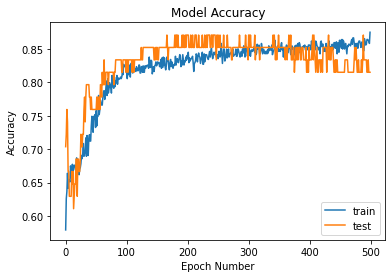

In [13]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(8,)))
model.add(Dropout(rate=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_train = model.fit(x, y, epochs=500, batch_size=50, verbose=0, validation_split=0.06)

plt.plot(model_train.history['accuracy'], label='train')
plt.plot(model_train.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

model.save('titanic_NN.h5')

In [17]:
import numpy as np
from keras.models import load_model
model_predict = load_model('titanic_NN.h5')
x_example = np.array([[1,1,30,2,2,50,1,2]])

prediction_num = model_predict.predict(x_example)
print(prediction_num)

if prediction_num < 0.5:
  prediction = "Not survived"
else:
  prediction = "Survived"

print(prediction)

[[0.77640855]]
Survived
